# TP3 : Logistic regression

## OHLEYER Antoine & SALAS HAbib

The purpose of this tutorial is to implement and use the Logistic Regression for binary classification. We will apply this
method to the problem of handwritten characters to learn how to
distinguish two numbers (here 5 and 6).

In [1074]:
from pylab import *
import numpy as np
#import matplotlib.pyplot as plt
from numpy import linalg as la
import warnings
warnings.filterwarnings("ignore")

## 1. Logistic regression, IRLS algorithm.

### Preliminary question: the algorithm

#### Have a look at the function `regression_logistique.m` and locate the main steps of the algorithm you have been taught (see course).
You can comment the code in the cell below.

In [1075]:
def regression_logistique(X,t,Nitermax=20,eps_conv=1e-3):
    '''Entrees :
    X = [ones(N_train,1) x_train];
    t = class_train 
    Nitermax = nombre maximale d'itérations (20 par défaut)
    eps_conv = critère de convergence sur norm(w-w_old)/norm(w) ; 
    eps_conv=1e-3 par défaut
    
    Sorties : 
    w : vecteur des coefficients de régression logistique
   Niter : nombre d'itérations utilisées effectivement
   
   Fonction de régression logistique pour la classification binaire.
   
   Utilisation :
       Nitermax = 50
       eps_conv = 1e-4
       [w,Niter] = regression_logistique(X,t,Nitermax,eps_conv)
    '''
    N_train = X.shape[0]

    #initialisation : 1 pas de l'algorithme IRLS
    w = np.zeros((X.shape[1],))
    w_old = w 
    y = 1/2*np.ones((N_train,))
    R = np.diag(y*(1-y))   # Initializing the reweighting matrix R
    z = X.dot(w_old)-la.inv(R).dot(y-t)
    w = la.inv(X.T.dot(R).dot(X)).dot(X.T).dot(R).dot(z)
    # boucle appliquant l'algortihme de Newton-Raphson
    Niter = 1
    while ( (la.norm(w-w_old)/la.norm(w)>eps_conv) & (Niter<Nitermax) ):# stop condition on both Number of iteration 
                                                                  # and  the relative distance between w and w_old
        Niter = Niter+1
        y = 1/(1+np.exp(-X.dot(w))) #Applying the sigmoid function 
        R = np.diag(y*(1-y)) # The reweighting matrix R
        w_old = w 
        z = X.dot(w_old)-la.inv(R).dot(y-t) 
        w = la.inv(X.T.dot(R).dot(X)).dot(X.T).dot(R).dot(z) #compute the new w for the new iteration of Newton-Raphson
    return w, Niter


### Reading & preparing synthetic data

Load the training and test data sets `synth_train.txt`
and `synth_test.txt`. The targets t belong to {1,2} and the features  
x belong to R^2. 

We have 100 training samples and 200 test samples

* the 1st column contains the label of each sample, 
* columns 2 and 3 contain the coordinate of each point.

In [937]:
# Training set
synth_train = np.loadtxt('synth_train.txt') 
class_train = synth_train[:,0]
class_train_1 = np.where(synth_train[:,0]==1)[0]
class_train_2 = np.where(synth_train[:,0]==2)[0]
x_train = synth_train[:,1:]
N_train = np.size(x_train,axis=0)

# Test set
synth_test = np.loadtxt('synth_test.txt')
class_test = synth_test[:,0]
class_test_1 = np.where(synth_test[:,0]==1)[0]
class_test_2 = np.where(synth_test[:,0]==2)[0]
x_test = synth_test[:,1:]
N_test = np.size(x_test,axis=0)

### Preparing features for logistic regression (binary classification)
First, we prepare the feature matrix and the target vector associated to 
the training and test sets:


In [938]:
X = np.hstack((np.ones((N_train,1)),x_train))
t = 2-class_train   # 0 if class=2, 1 if class=1
X_test = np.hstack((np.ones((N_test,1)),x_test))
t_test = 2-class_test   # 0 if class=2, 1 if class=1

### Exercise 1 : the logistic function of decision

1. Use the function `regression_logistique.m` to estimate the logistic
regression vector `w`. *Indication : use `Nitermax = 50;
eps_conv=1e-3;`.*
2. Compute the decision function $f(x) = argmax_k P(C_k|x)$ on the test set
to get the classification results. Recall that $y_n=\sigma(w^T x)$ (logistic function)
and that *using vectors* you may directly write $y=\sigma(Xw)$, with the
column of ones in X.
3. Display the results by plotting the points from both the training set
and the test set.
4. Write the equation which defines the decision boundary.
5. Artificially add a few points to the training set far from the decision boundary to check the robustness of logistic regression to outliers. Check the behaviour of LDA for comparison in this case and comment. 


<font color="blue">1. Use the function **regression_logistique** to estimate the logistic regression vector **w** : <font>

In [939]:
#Exercise 1
w, Niter = regression_logistique(X,t,Nitermax=50,eps_conv=1e-3)
print(w)

[-15.206658    -7.91866363   6.56243114]


<font color="blue">2. Compute the decision function $f(x) = argmax_k P(C_k|x)$ on the test set :<font>

In [1037]:
# Given a test set (arra like) and the computed weights,
# outputs the class of each data point 
def f(X, w=w):
    output=np.empty(0)
    for i in range(X.shape[0]):
        if 1/(1+np.exp(-X[i].dot(w)))>=0.5:
            output=np.append(output, 1)
        else: 
            output=np.append(output, 0)
    return output

# given two array like inputs of the same shape, 
# outputs the classification error (frenquency of misclassified data points)
def error(t_pred, t_test):
    pred_lenght=len(t_pred)
    error_indexes=[i for i in range(pred_lenght) if t_pred[i]!=t_test[i]]
    return 100*(len(error_indexes)/pred_lenght)

In [947]:
t_pred=f(X_test)
tr_pred=f(X)
print("The classification error on the tran set is:  {error} %".format(error=error(tr_pred, t)))
print("The classification error on the test set is:  {error} %".format(error=error(t_pred, t_test)))

The classification error on the tran set is:  3.0 %
The classification error on the test set is:  6.0 %


<font color="blue">3. & 4. **Display the results** by plotting the points from both the training set
and the test set<font> and <font color="blue"> **Write the equation** which defines the **decision boundary**. <font>

In [950]:
# This function draws the logistic regression boundry given the weights (w) and the borders of the x_axis (xmin,xmax)
def draw_boundry(w, xmin, xmax, label=None): 
    x1 = np.linspace(xmin,xmax,10) 
    x2 = (-w[0]-w[1]*x1)/w[2]
    plt.plot(x1,x2,'k--', label=label)
    plt.legend()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


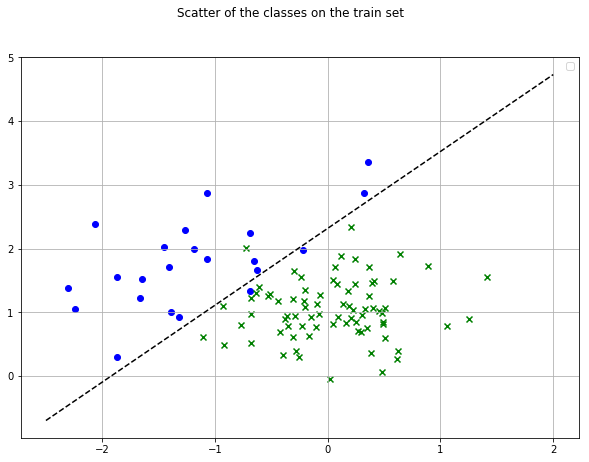

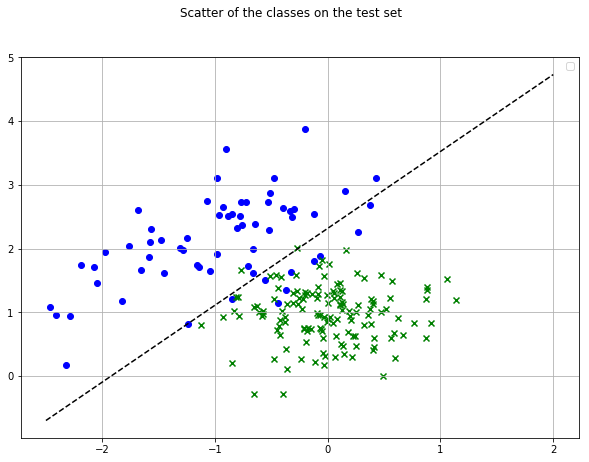

In [954]:
train_1=np.take(x_train, class_train_1,axis=0) # select the class_1 data points from the x_train
train_2=np.take(x_train, class_train_2, axis=0) # select the class_2 data points from the x_train

test_1=np.take(x_test, class_test_1,axis=0)
test_2=np.take(x_test, class_test_2, axis=0)

#draw the scatter of the two classes for the train set and separate them with the computed logistic resgression boundary
train_fig, ax_train = plt.subplots(figsize=(10,7))

ax_train.scatter(train_1[:,0],train_1[:,1],c='b', alpha=1, marker='o')
ax_train.scatter(train_2[:,0],train_2[:,1],c='g', alpha=1, marker='x')
ax_train.grid(True)
train_fig.suptitle("Scatter of the classes on the train set")
draw_boundry(w, xmin=-2.5, xmax=2)

#draw the scatter of the two classes for the train set and separate them with the computed logistic resgression boundary
test_fig, ax_test=plt.subplots(figsize=(10,7))

ax_test.scatter(test_1[:,0],test_1[:,1],c='b', alpha=1, marker='o')
ax_test.scatter(test_2[:,0],test_2[:,1],c='g', alpha=1, marker='x')

ax_test.grid(True)
test_fig.suptitle("Scatter of the classes on the test set")
draw_boundry(w, xmin=-2.5, xmax=2)

plt.show()

<font color="blue">5. Artificially add a few points to the training set far from the decision boundary to check the robustness of logistic regression to outliers. Check the behaviour of LDA for comparison in this case and comment.<font>

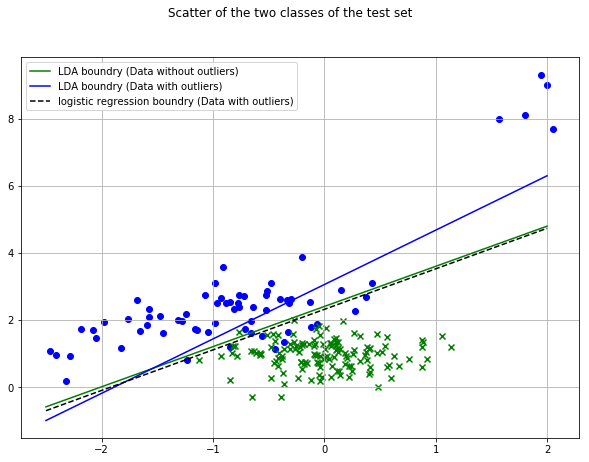

In [970]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(solver='svd', store_covariance=True) # lDA to be fitted on the original train data 
lda_with_outliers=LinearDiscriminantAnalysis(solver='svd', store_covariance=True) # LDA to be fitted on the altered train 
                                                                                  #data with outliers 

outliers = np.array([[1,2,9], [1,1.57,8], [1,2.05,7.7], [1,1.8,8.1], [1,1.95,9.3]])

train_outliers = np.hstack((np.ones((len(outliers),1)),outliers[:,1:]))

LDA = lda.fit(X[:,1:], t) # fit LDA on the original train data

X_out=np.vstack((X, train_outliers)) # Adding outliers to the train set
t_out=np.hstack((t, outliers[:,0]))

w_out, Niter_out = regression_logistique(X_out,t_out,Nitermax=50,eps_conv=1e-3) # compute logistic regression weights  
                                                                                # on the alterated data train
LDA_outliers = lda_with_outliers.fit(X_out[:,1:], t_out) # fit LDA on the modified tran set (with outliers) 

x=np.linspace(-2.5,2,100)
# yy_perturbed = (-clf_perturbed.coef_[0][0]*xx - clf_perturbed.intercept_[0])/clf_perturbed.coef_[0][1]
a,b=lda.coef_[0] # retrieve fitted LDA boundary coefficients
a1,b1=lda_with_outliers.coef_[0] # retrieve fitted LDA boundary coefficients

# draw the plots of the test set with the LDA boundaries and that of the logistic regression 
test_fig, ax_test=plt.subplots(figsize=(10,7))

# ax_test.scatter(test_1[:,0],test_1[:,1],c='b', alpha=1, marker='o')
# ax_test.scatter(test_2[:,0],test_2[:,1],c='g', alpha=1, marker='x')
ax_test.scatter(outliers[:,1],outliers[:,2],c='b', alpha=1, marker='o')
ax_test.scatter(test_1[:,0],test_1[:,1],c='b', alpha=1, marker='o')
ax_test.scatter(test_2[:,0],test_2[:,1],c='g', alpha=1, marker='x')

ax_test.grid(True)
test_fig.suptitle("Scatter of the two classes of the test set")
ax_test.plot(x, (-a*x-lda.intercept_[0])/b,c='g',label='LDA boundry (Data without outliers)')
ax_test.plot(x, (-a1*x-lda.intercept_[0])/b1,c='b',label='LDA boundry (Data with outliers)')
draw_boundry(w_out, xmin=-2.5, xmax=2, label="logistic regression boundry (Data with outliers)")
ax_test.legend(loc='best')

**We can clearly see that the LDA boundary slope changed significately, which means that the LDA is sensitive to outliers, while the logistic regression is quite the same and the did not change, which make the logistic regression robust to outliers.** This may be explained by the fact that those outliers are easy to classify, so they are far from the boundary, so they are weighted to very small values (~0).  

## 2. Application: handwritten digits recognition 5 & 6
We load 2 matrices which contain each a sequence of examples of 16x16 images 
of handwritten digits which are 5 and 6 here. Each line of the matrix
contains 256 pixel values coding for the gray level of a 16x16 image.

In [971]:
train_5 = np.loadtxt('train_5.txt',delimiter=',')   # 556 samples
train_6 = np.loadtxt('train_6.txt',delimiter=',')   # 664 samples

### Examples of images


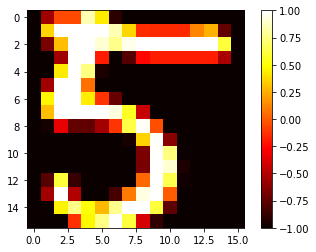

In [972]:
# Digit 5
n=9;
I = np.reshape(train_5[n,:],(16,16))

plt.imshow(I,cmap='hot')
plt.colorbar()
plt.show()

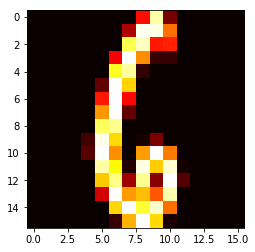

In [973]:
# Digit 6
n=5;
I = reshape(train_6[n,:],(16,16))

plt.imshow(I,cmap='hot')
plt.show()

### Separating the training and test sets

We keep in the training set the 145 first images of 5s and the 200 first
images of 6s:


In [974]:
x_train_brut = np.vstack((train_5[:145,:], train_6[:200,:]))
N_train = np.size(x_train_brut,axis=0)
class_train = np.ones((345,1))   # label 1 for digit 6
class_train[:145] = 0       # label 0 for digit 5

x_test_brut = np.vstack((train_5[145:,:], train_6[200:,:]))
N_test = np.size(train_5,axis=0)+np.size(train_6,axis=0)-N_train

## Exercise 2: logistic regression to classify 5 & 6

1. Note that pixel values are between -1 and 1 by using the functions
 `min(I(:))` and `max(I(:))`.
2. Identify the indices of the most significant pixels, which are defined 
as having a standard deviation greater than 0.5 here. We denote by `lis_sig`
the list of positions of these significant pixels in the image vector.
_Indication : the function `std` gives the standard deviation (columnwise
in matrices) and you should find 173 pixel positions.
3. Show a binary image to locate these pixels.
_Indication : `Isig = zeros(16); Isig(list_sig)=1; Isig=Isig';`._
4. Define the training set `x_train` from `x_train_brut` from the significant pixels only.
5. Do the same with `x_test_brut` to extract `x_test`.
6. Use `regression_logistique.m` to estimate the logistic regression vector
`w` from the training set `x_train`. 
Choose `Nitermax = 13; eps_conv = 1e-3;`
7. Compute the decision function and the labels of the test set `x_test`. 
_Indication : do not forget the column of ones !_
8. Estimate the classification error rate by using :
`erreur = sum(abs(class-class_test))/N_test;`.
9. Locate some misclassified examples and visualize the corresponding image.
Comment on your results and observations.


**1. Note that pixel values are between -1 and 1 by using the functions
 `min(I(:))` and `max(I(:))`.**

In [984]:
# Exercise 2
print(I.min())
print(I.max())

-1.0
1.0


**2. Identify the indices of the most significant pixels, which are defined as having a standard deviation greater than 0.5 here.** We denote by `lis_sig`
the list of positions of these significant pixels in the image vector.
_Indication : the function `std` gives the standard deviation (columnwise
in matrices) and you should find 173 pixel positions.

In [985]:
std_s=np.array([[x_train_brut[:,i].std() for i in range(256)]]).T
list_sig = np.where(std_s[:,0]>=0.5)[0]
print("The positions of the most significant pixels : \n",list_sig)
print("\nThe number of positions : ", len(list_sig))

The positions of the most significant pixels : 
 [  7   8   9  10  11  12  20  21  22  23  24  25  26  27  28  29  36  37
  38  39  40  41  42  43  44  45  51  52  53  54  55  56  57  58  59  66
  67  68  69  70  71  72  73  82  83  84  85  86  87  88  89  98  99 100
 101 102 103 104 105 106 107 114 115 116 117 118 119 120 121 122 123 124
 125 130 131 132 133 134 135 136 137 138 139 140 141 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 161 162 163 164 165 166 167 168 169
 170 171 172 173 174 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 193 194 195 196 197 198 199 200 201 202 203 204 205 206 209 210 211
 212 213 214 215 216 217 218 219 220 221 226 227 228 229 230 231 232 233
 234 235 236 244 245 246 247 248 249 250 251]

The number of positions :  173


**3. Show a binary image to locate these pixels.**

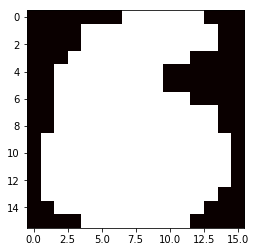

In [986]:
proof_img = reshape(np.std(x_train_brut, axis=0)>=0.5,(16,16))
plt.imshow(proof_img,cmap='hot')
plt.show()

**<p><center>We can say that the most important pixels that helps defining our two digits are concentrated in the middle of the image, which is expected because of the digits inner shape.</center></p>**

**4. Define the training set `x_train` from `x_train_brut` from the significant pixels only.**


In [987]:
# x_train=np.vstack([x_train_brut[:,i] if i in list_sig else -np.ones((N_train)) for i in range(x_train_brut.shape[1])]).T
x_train=np.take(x_train_brut, list_sig, axis=1)

**5. Do the same with `x_test_brut` to extract `x_test`.**


In [988]:
# x_test=np.vstack([x_test_brut[:,i] if i in list_sig else np.zeros((N_test)) for i in range(x_test_brut.shape[1])]).T
x_test=np.take(x_test_brut, list_sig, axis=1)

**6. Use `regression_logistique.m` to estimate the logistic regression vector
`w` from the training set `x_train`. 
Choose `Nitermax = 13; eps_conv = 1e-3;`**

In [989]:
#add intercept coefficients : ones in the first column
X_train = np.hstack((np.ones((N_train,1)),x_train))
T_train = np.column_stack(class_train)[0]
w, Niter = regression_logistique(X_train,T_train,Nitermax=13,eps_conv=1e-2)

**7. Compute the decision function and the labels of the test set `x_test`. 
_Indication : do not forget the column of ones !_**


In [990]:
X_test=np.hstack((np.ones((N_test,1)),x_test))
Test_classif_rests=f(X_test,w=w)
T_test = np.hstack((np.zeros((411,)), np.ones((464,))))

**8. Estimate the classification error rate by using :
`erreur = sum(abs(class-class_test))/N_test;`.**


In [993]:
print("- Test classification error is:  {error} %".format(error=error(Test_classif_rests, T_test)))

Train_classif_rests=f(X_train,w=w)
print("- Training classification error is:  {error} %".format(error=error(Train_classif_rests, T_train)))

print ("- The model misclassified",np.sum(T_test[np.where(Test_classif_rests!=T_test)]==0),
       "images of 5 and", np.sum(T_test[np.where(Test_classif_rests!=T_test)]==1),"images of 6.")

- Test classification error is:  7.885714285714286 %
- Training classification error is:  0.0 %
- The model misclassified 45 images of 5 and 24 images of 6.


**Note** : By changing the number of iterations, we noticed that the test error decreases when we decrease the number of iteration. We postualte that this is due to overfitting, an explanation that does not seem intuitive, because overfitting is in general a proprety of the model and so the number of iterations is expected to not have this huge effect on the results. Searching we found that this problem is quite familiar with linear separable data, but with no detailed explanations.

To see if this is due to the (train,test) sets used in the training we made a bootsrapping by replacement on the whole data and computed the error for various bootsrap samples.

In [998]:
from Bootstrap import split_Samples #a method we already coded the previous TP to split bootsrap sample to test and train sets
                                    # The .py file from which the method is imported is in the .ipynb directory
from sklearn.utils import resample # Used for bootstrapping, by sampling from the data set

def bootsraping(nbr_bootsrap):
    bootsraping_samples_5=[resample(train_5,n_samples=556) for i in range(nbr_bootsrap)]
    bootsraping_samples_6=[resample(train_6,n_samples=664) for i in range(nbr_bootsrap)]
    error_it=[]
    for itr in range(2, 9):
        errors=[]
        for sample_5,sample_6 in zip(bootsraping_samples_5,bootsraping_samples_6):
            sample_train_5, sample_test_5=split_Samples(sample_5, train_5)
            sample_train_6, sample_test_6=split_Samples(sample_6, train_6)
            train=np.take(np.vstack((sample_train_5, sample_train_6)), list_sig, axis=1)
            test=np.take(np.vstack((sample_test_5, sample_test_6)), list_sig, axis=1)
            N_train = np.size(train,axis=0)
            N_test=np.size(test,axis=0)
            class_train = np.ones((N_train,1))   # label 1 for digit 6
            class_train[:len(sample_train_5)] = 0       # label 0 for digit 5
            w, Niter = regression_logistique(np.hstack((np.ones((N_train,1)),train)),class_train[:,0],Nitermax=itr,eps_conv=1e-3)
            Test_classif_rests=f(np.hstack((np.ones((N_test,1)),test)),w=w)
            class_test = np.ones((N_test,1))
            class_test[:len(sample_test_5)] = 0 
            errors.append(error(Test_classif_rests, class_test[:,0]))
        error_it.append(errors)
    return error_it

In [1000]:
# You might have a "sigular matrix error while computing this for random boostrap samples. 
# Therfore we already ploted the results above for nbr_bootsrap=50
# erroors=bootsraping(50)

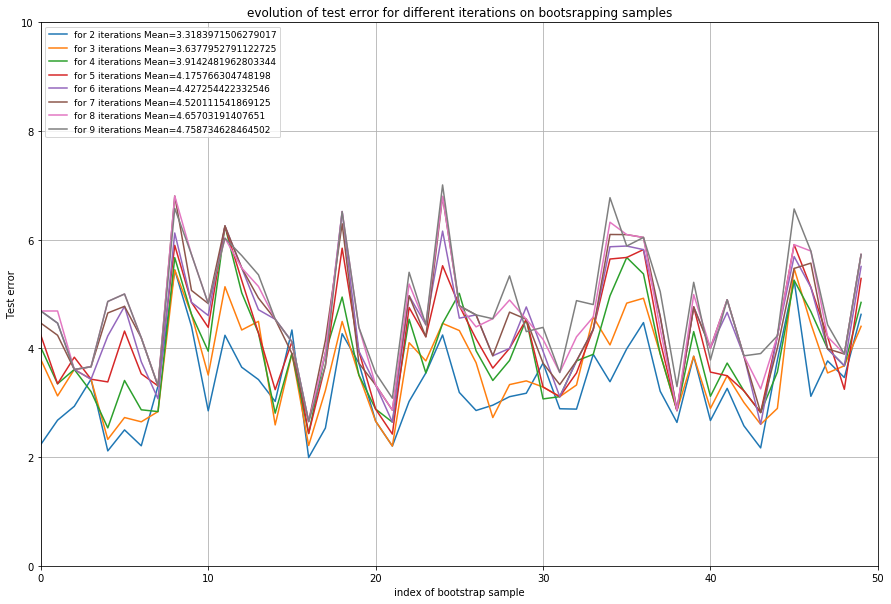

In [747]:
fig=plt.figure(figsize=(15,10))
for i in range(len(erroors)):
    plt.plot(erroors[i], label="for "+str(i+2)+" iterations Mean="+str(np.array(erroors[i]).mean()))
plt.grid(True)
plt.axis([0,50,0,10])
plt.legend(loc=2, prop={'size': 9})
plt.xlabel("index of bootstrap sample")
plt.ylabel("Test error")

plt.title("evolution of test error for different iterations on bootsrapping samples")
plt.show()
fig.savefig("evolution of test error for different iterations on bootsrapping samples")

- From the above plot we can see that the mean error is rightfuly increasing the number of iterations, which raise up again the eventual possibility of overfitting.

In [1003]:
# given two array like inputs of the same shape, 
# outputs the misclassed data pointes
def misclassed_pts(t_pred, t_test):
    pred_lenght=len(t_pred)
    return [t_test[i] for i in range(pred_lenght) if t_pred[i]!=t_test[i]]

In [1013]:
from Bootstrap import split_Samples
from sklearn.utils import resample # Used for bootstrapping, by sampling from the data set
from collections import Counter


def plot_missclasified(nbr_bootsrap):
    fig, ax = plt.subplots(figsize=(15,10))
    bootsraping_samples_5=[resample(train_5,n_samples=556) for i in range(nbr_bootsrap)]
    bootsraping_samples_6=[resample(train_6,n_samples=664) for i in range(nbr_bootsrap)]
    misclassed_5s=[]
    misclassed_6s=[]
    for sample_5,sample_6 in zip(bootsraping_samples_5,bootsraping_samples_6):
        sample_train_5, sample_test_5=split_Samples(sample_5, train_5)
        sample_test_6, sample_train_6=split_Samples(sample_6, train_6)
        train=np.take(np.vstack((sample_train_5, sample_train_6)), list_sig, axis=1)
        test=np.take(np.vstack((sample_test_5, sample_test_6)), list_sig, axis=1)
        N_train = np.size(train,axis=0)
        N_test=np.size(test,axis=0)
        class_train = np.ones((N_train,1))   # label 1 for digit 6
        class_train[:len(sample_train_5)] = 0       # label 0 for digit 5
        w, Niter = regression_logistique(np.hstack((np.ones((N_train,1)),train)),class_train[:,0],Nitermax=8,eps_conv=1e-3)
        Test_classif_rests=f(np.hstack((np.ones((N_test,1)),test)),w=w)
        class_test = np.ones((N_test,1))
        class_test[:len(sample_test_5)] = 0 
        misclas_pts=misclassed_pts(Test_classif_rests, class_test[:,0])
        misclassed_5s.append(Counter(misclas_pts)[0])
        misclassed_6s.append(Counter(misclas_pts)[1])
    indices=np.arange(nbr_bootsrap)
    width = 0.35
    p1 = plt.bar(indices, misclassed_5s, width)
    p2 = plt.bar(indices, misclassed_6s, width,bottom=misclassed_5s)
    plt.title('Bootsrap Misclassification of Digits 5 & 6')
    plt.legend((p1[0], p2[0]), ('Misclassified 5s', 'Misclassified 6s'))
    plt.show()
    fig.savefig("Bootsrap Misclassification of Digits 5 & 6")

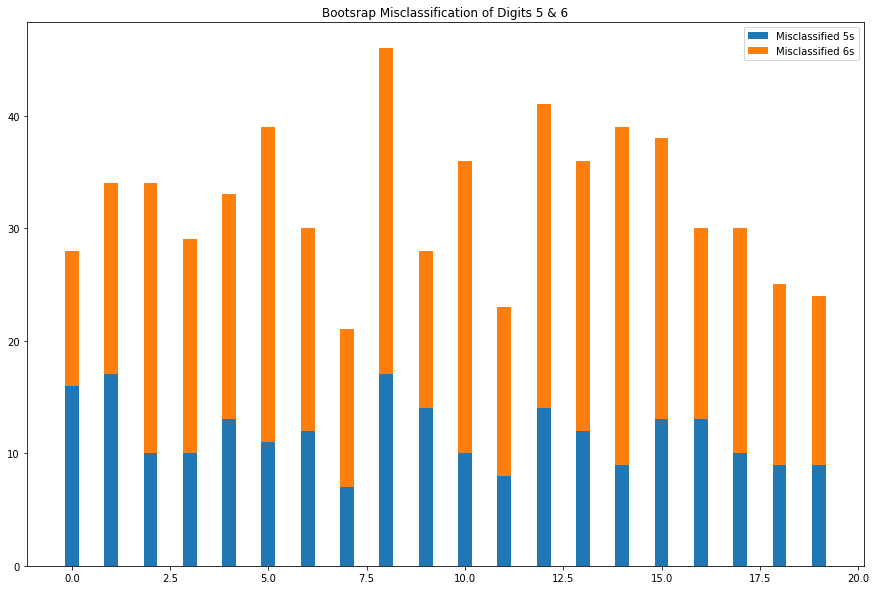

In [1014]:
plot_missclasified(20)

- Throughout the boostrapping on different data sets we see that the mean number of misclassified points is quite steady. We may tend to say that the classification error on 5 is bigger, but it's clearly due the diffrence on the number of given data for the training and test. We made a simple test, by changing the **sample_test_6, sample_train_6** order in the bootsrapping to have a small train set for 6 and we notices that the error on misclassifying 6 became more than the error on misclassifying 5.

**Let's now have a look at some misclassified digits :**

In [1067]:
def proba(X, w=w):
    return 1/(1+np.exp(-X.dot(w)))

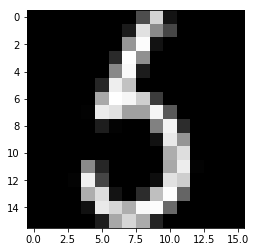

Probability of being equal to 6:  0.9973027122465665


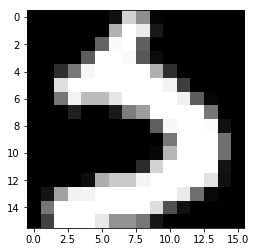

Probability of being equal to 6:  0.9991132758833076


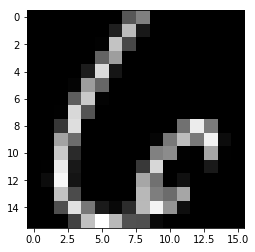

Probability of being equal to 5:  0.8014654372866874


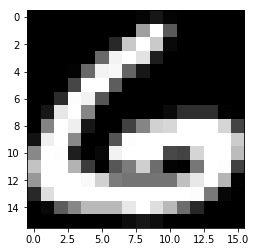

Probability of being equal to 5:  0.8677895129804539


In [1073]:
# plt.subplots(4, 2, figsize=(10,9))
for i,n in enumerate([109, 379]):
    I = reshape(x_test_brut[n,:],(16,16))
    plt.imshow(I,cmap='gray')
    plt.show()
    print("Probability of being equal to 6: ", proba(X_test[n,:]))
for i,n in enumerate([655, 832]):
    I = reshape(x_test_brut[n,:],(16,16))
    plt.imshow(I,cmap='gray')
    plt.show()
    print("Probability of being equal to 5: ", 1-proba(X_test[n,:]))

From the plot of some missclasified images we can see that those images are actually hard to classify and that the output probability given by our model is classifying those points in a deterministic way. This might be due to those points being close to the logistic regression boundary, which raise their probabilities of classification  $argmax_k P(C_k|x)$ but causes their misclassification. 

**9. Locate some misclassified examples and visualize the corresponding image.
Comment on your results and observations.**

## 3. Logistic regression using `scikit-learn`

1. **Go to** http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html for a presentation of the logistic regression model in `scikit-learn`.

2. **Apply** it to the present data set.

3. **Comment** on the use of logistic regression.

*Indication : you may have a look at* 

a) Theory : http://openclassroom.stanford.edu/MainFolder/DocumentPage.php?course=MachineLearning&doc=exercises/ex5/ex5.html

b) Video :  https://www.coursera.org/learn/machine-learning/lecture/4BHEy/regularized-logistic-regression 

c) Example : http://scikit-learn.org/stable/auto_examples/exercises/plot_digits_classification_exercise.html#sphx-glr-auto-examples-exercises-plot-digits-classification-exercise-py

*for a short presentation of regularized logistic regression.*

In [928]:
# Include your code here
import pandas as pd
from sklearn.linear_model import LogisticRegression

def logistic_regression_sk(penalty='l2', solver='liblinear'):
    clf = LogisticRegression(random_state=0, solver=solver, penalty=penalty, multi_class='ovr')
    return (1-clf.fit(X_train, T_train).score(X_test, T_test))*100

In [929]:
solvers_L2 = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
print("- Accuracies for solver in penality L2 : \n")
for solver in solvers_L2:
    print('Logistic regressions with L2 penalty and the solver "{solver}"'.format(solver=solver))
    print("the error rate for the logistic regression is : ", logistic_regression_sk(solver=solver),"%")
    print()

- Accuracies for solver in penality L2 : 

Logistic regressions with L2 penalty and the solver "newton-cg"
the error rate for the logistic regression is :  2.6285714285714246 %

Logistic regressions with L2 penalty and the solver "lbfgs"
the error rate for the logistic regression is :  2.6285714285714246 %

Logistic regressions with L2 penalty and the solver "liblinear"
the error rate for the logistic regression is :  2.742857142857147 %

Logistic regressions with L2 penalty and the solver "sag"
the error rate for the logistic regression is :  2.5142857142857133 %

Logistic regressions with L2 penalty and the solver "saga"
the error rate for the logistic regression is :  2.6285714285714246 %



In [921]:
solvers_L1 = [ 'liblinear',  'saga']
print("Accuracies for solver in penality L1 \n")
for solver in solvers_L1:
    print('Logistic regressions L1 penality and with the solver "{solver}"'.format(solver=solver))
    print("the error rate for the logistic regression is : ", logistic_regression_sk(penalty='l1',solver=solver),"%")
    print()

Accuracies for solver in penality L1 

Logistic regressions L1 penality and with the solver "liblinear"
the error rate for the logistic regression is :  3.0857142857142805 %

Logistic regressions L1 penality and with the solver "saga"
the error rate for the logistic regression is :  2.857142857142858 %



We clearly see that the test error with of `Sickit Learn logistic Regression` is less the given model computed one. First, throughout the documentation, the algorithms of **sklearn** all penalized ones, in addition to the fact that they all use specific optimization methods while in our case we used a non penalized model with **Newton-Raphson** optimization method.

To see if the regularization helped a lot on boosting the algorithm's performance by avoiding the overfitting, we will penalize one of the previous **sklearn** logistic regression algorithms with a $\lambda=0$, but given the formulation of the logistic regression in Sickit learn https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression. $\lambda=\frac{1}{C}$ which means that $C=+\infty$. 

In [934]:
def logistic_regression_sk(penalty='l2', solver='liblinear'):
    clf = LogisticRegression(random_state=0, solver=solver, penalty=penalty, multi_class='ovr', C=1e50)
    return (1-clf.fit(X_train, T_train).score(X_test, T_test))*100

print("- As an example, without penalization, the test error for the solver \"newton-cg\" : ",logistic_regression_sk(penalty='l2',solver="newton-cg"))

- As an example, without penalization, the test error for the solver "newton-cg" :  3.0857142857142805


- Omitting the penalization did not affect dramaticaly the performance of the algorithm. We can prouve the same thing for the other methods whatever the type of penalization used. Therfore, we can assume that the performances of the **optimization algorithms** used are the deterministic factors of the regression results.

Looking back to the test errors for different algorithms of optimization with diffrent penalization methods, we  : <br>
- For the same penalization method, the algorithms of optimization have slightly diffrent performances with a maximum gap of **0.2**
- The penalty **L1** is less accurate than the penalty **L2**. It is partly related to the fact that of the problem being non strictly convex, for a penalty **L1** we can image that as a square (rhumb) whereas for a penalty **L2** is a circle, however the penalty **L1** is stronger and enable to be less sensitive to outliers.

- **<font color="blue"> A reflex we should have is to modify the given model with a another one that uses a different optimization method. A simple one is a fixed step gradient : <font>**

In [1050]:
def logit_by_gradient_descent(X_train, t_train, num_iter, descent_step):
    weights = np.zeros(X_train.shape[1])
    for step in range(num_iter):
        y = 1 / (1 + np.exp(-np.dot(X_train, weights)))
        gradient = np.dot(X_train.T, t_train - y)
        weights += descent_step * gradient
    return weights

In [1053]:
w_2 = logit_by_gradient_descent(X_train, T_train, num_iter = 3000, descent_step = 1e-5)
t_pred = f(X_test,w_2)
print ("The test misclassification error is: " ,100*np.sum(t_pred!=T_test)/len(T_test), "%")

The test misclassification error is:  2.2857142857142856 %


- For a well chosen **descent_step** and suffientely big number of iterations we can see that the use of the gradient descent algorithm is already giving better test results than Newton-Raphson optimization method. We can not draw conlusions from here. Our coming step would be to make a botsrapping on this new designed logistic regression and other ones that uses other algorithms (Quasi_newtonian methods, conjuguated gradient descent,..) and eventually introduce the penalization on our designed algorithms to compare them to the one used in Sickit Learn library in order to make more insights about the specific performances of each ones.   